In [1]:
#use TF-IDF to convert text into matrix of TF-IDF features
#multinomial naive bayes works well with frequency data
#include non-text features (upvotes, date, num_comments) into the text vector to
#create single input matrix for the model
#split data into training and test sets
#train then evaluate the model(accuracy, precision, recall, f1 score)

#Feature engineering
#maybe include N-grams
#including date

#hyperparameter tuning
#alpha 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
from sklearn.model_selection import cross_val_score 
df=pd.read_csv('../data/reddit_depression_dataset_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text
0,0,0.0,2014-07-14 03:35:09,4.0,0.0,Deep thoughts underdog Only when we start cons...,"['deep', 'thoughts', 'underdog', 'only', 'when...","['deep', 'thoughts', 'underdog', 'only', 'when...","['deep', 'thoughts', 'underdog', 'start', '99'...","['deep', 'thought', 'underdog', 'start', '99',...","['deep', 'thought', 'underdog', 'onli', 'when'...",deep thought underdog start 99 underdog start ...,deep thought underdog onli when we start consi...
1,1,0.0,2014-09-13 00:31:19,4.0,1.0,"I like this sub, there's only two posts yet I ...","['i', 'like', 'this', 'sub', ',', ""there's"", '...","['i', 'like', 'this', 'sub', 'only', 'two', 'p...","['posts', 'coming', 'human', 'morality', 'joke...","['post', 'come', 'human', 'moral', 'joke', 'lo...","['i', 'like', 'thi', 'sub', 'onli', 'two', 'po...",post come human moral joke long abscenc hope d...,i like thi sub onli two post yet i keep come b...
2,2,0.0,2014-11-20 04:31:58,6.0,1.0,Rebirth! Hello. \nI am the new guy in charge h...,"['rebirth', '!', 'hello', '.', 'i', 'am', 'the...","['rebirth', 'hello', 'i', 'am', 'the', 'new', ...","['rebirth', 'guy', 'charge', 'thegood', 'ofc',...","['rebirth', 'guy', 'charg', 'thegood', 'ofc', ...","['rebirth', 'hello', 'i', 'am', 'the', 'new', ...",rebirth guy charg thegood ofc bring weirdpinea...,rebirth hello i am the new guy in charg here b...
3,3,0.0,2014-11-20 19:38:05,25.0,2.0,"""I want to be like water. I want to slip throu...","['""', 'i', 'want', 'to', 'be', 'like', 'water'...","['i', 'want', 'to', 'be', 'like', 'water', 'i'...","['water', 'slip', 'fingers', 'hold', 'ship', '...","['water', 'slip', 'finger', 'hold', 'ship', 'm...","['i', 'want', 'to', 'be', 'like', 'water', 'i'...",water slip finger hold ship michel william,i want to be like water i want to slip through...
4,5,0.0,2014-11-22 19:17:39,8.0,23.0,What is the limit of the knowledge and power a...,"['what', 'is', 'the', 'limit', 'of', 'the', 'k...","['what', 'is', 'the', 'limit', 'of', 'the', 'k...","['limit', 'knowledge', 'power', 'human', 'pers...","['limit', 'knowledg', 'power', 'human', 'perso...","['what', 'is', 'the', 'limit', 'of', 'the', 'k...",limit knowledg power human person infinit grow,what is the limit of the knowledg and power a ...


In [4]:
# Assuming df is your DataFrame and 'date' is the column name
df['date'] = pd.to_datetime(df['date'])  # Convert to datetime
df['year'] = df['date'].dt.year  # Extract the year

# If you want to replace the original 'date' column with the year
df['date'] = df['year']
df.drop(columns=['year'], inplace=True)  # Optionally drop the 'year' column if not needed

# Display the modified DataFrame
df.head()

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text
0,0,0.0,2014,4.0,0.0,Deep thoughts underdog Only when we start cons...,"['deep', 'thoughts', 'underdog', 'only', 'when...","['deep', 'thoughts', 'underdog', 'only', 'when...","['deep', 'thoughts', 'underdog', 'start', '99'...","['deep', 'thought', 'underdog', 'start', '99',...","['deep', 'thought', 'underdog', 'onli', 'when'...",deep thought underdog start 99 underdog start ...,deep thought underdog onli when we start consi...
1,1,0.0,2014,4.0,1.0,"I like this sub, there's only two posts yet I ...","['i', 'like', 'this', 'sub', ',', ""there's"", '...","['i', 'like', 'this', 'sub', 'only', 'two', 'p...","['posts', 'coming', 'human', 'morality', 'joke...","['post', 'come', 'human', 'moral', 'joke', 'lo...","['i', 'like', 'thi', 'sub', 'onli', 'two', 'po...",post come human moral joke long abscenc hope d...,i like thi sub onli two post yet i keep come b...
2,2,0.0,2014,6.0,1.0,Rebirth! Hello. \nI am the new guy in charge h...,"['rebirth', '!', 'hello', '.', 'i', 'am', 'the...","['rebirth', 'hello', 'i', 'am', 'the', 'new', ...","['rebirth', 'guy', 'charge', 'thegood', 'ofc',...","['rebirth', 'guy', 'charg', 'thegood', 'ofc', ...","['rebirth', 'hello', 'i', 'am', 'the', 'new', ...",rebirth guy charg thegood ofc bring weirdpinea...,rebirth hello i am the new guy in charg here b...
3,3,0.0,2014,25.0,2.0,"""I want to be like water. I want to slip throu...","['""', 'i', 'want', 'to', 'be', 'like', 'water'...","['i', 'want', 'to', 'be', 'like', 'water', 'i'...","['water', 'slip', 'fingers', 'hold', 'ship', '...","['water', 'slip', 'finger', 'hold', 'ship', 'm...","['i', 'want', 'to', 'be', 'like', 'water', 'i'...",water slip finger hold ship michel william,i want to be like water i want to slip through...
4,5,0.0,2014,8.0,23.0,What is the limit of the knowledge and power a...,"['what', 'is', 'the', 'limit', 'of', 'the', 'k...","['what', 'is', 'the', 'limit', 'of', 'the', 'k...","['limit', 'knowledge', 'power', 'human', 'pers...","['limit', 'knowledg', 'power', 'human', 'perso...","['what', 'is', 'the', 'limit', 'of', 'the', 'k...",limit knowledg power human person infinit grow,what is the limit of the knowledg and power a ...


see if there is a relationship between date and label

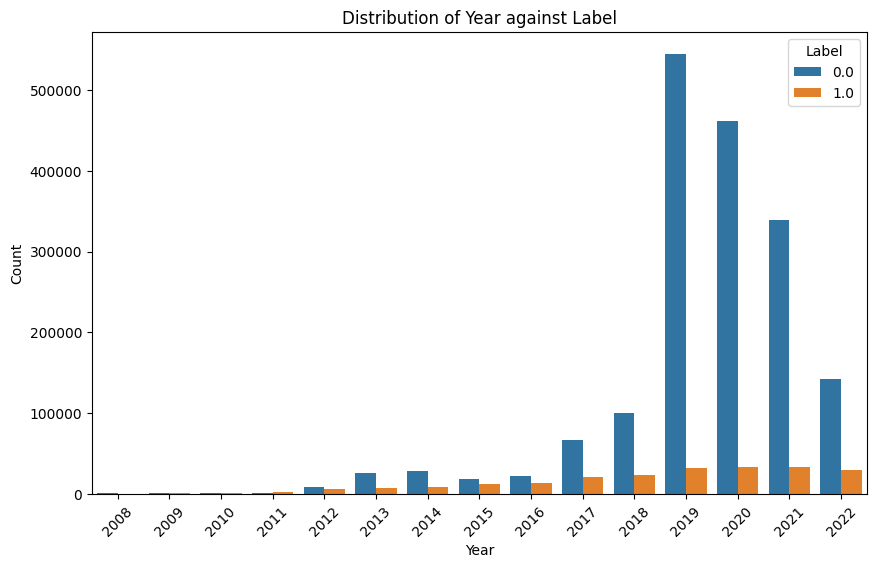

In [5]:
# Plot the distribution of the year against the label
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='date', hue='label')
plt.title('Distribution of Year against Label')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Label')
plt.xticks(rotation=45)
plt.show()

there is small correlation between year and posts labelled as depressed. the number of depressed posts are increasing

checking for negative values and handling them.reason being multinomialNB model does not accept negative values in input data

In [6]:
#check if there negative values in the upvotes column of the dataset
df[df['upvotes']<0]

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text


In [7]:
#check if there are negative values in the num_comemnts column of the dataset
df[df['num_comments']<0]

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text
1772493,2020957,1.0,2015,8.0,-3.0,somebody please help me i cant type all the st...,"['somebody', 'please', 'help', 'me', 'i', 'can...","['somebody', 'please', 'help', 'me', 'i', 'can...","['type', 'stuff', 'talk', 'preferably', 'skype...","['type', 'stuff', 'talk', 'prefer', 'skype', '...","['somebodi', 'pleas', 'help', 'me', 'i', 'cant...",type stuff talk prefer skype text voic advanc,somebodi pleas help me i cant type all the stu...
1853457,2182091,1.0,2011,36.0,-2.0,Life Graph [crosspost from r/pics],"['life', 'graph', '[', 'crosspost', 'from', 'r...","['life', 'graph', 'crosspost', 'from', 'r', 'p...","['life', 'graph', 'crosspost', 'pics']","['life', 'graph', 'crosspost', 'pic']","['life', 'graph', 'crosspost', 'from', 'r', 'p...",life graph crosspost pic,life graph crosspost from r pic


it does not make sense that there are negative number of comments.change it to 0

In [8]:
df['num_comments']=df['num_comments'].apply(lambda x: 0 if x<0 else x)

In [9]:
#check if there are negative values in the num_comemnts column of the dataset
df[df['num_comments']<0]
# there should be no negative values in the num_comments column

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text


In [10]:
prior_prob_depressed=len(df[df.label==1])/len(df)
print('Prior probability of being depressed:',prior_prob_depressed)

Prior probability of being depressed: 0.11341759054177354


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [12]:
#select relevant features
X_text=df['combined_stemmed_text']
X_numeric=df[['upvotes','num_comments','date']]
y=df['label']

In [13]:
# #vectorise the text
# tfidf=TfidfVectorizer(max_features=500)#max_features= based on unique words in the combined_stemmed_text
# #to handle NaN values
# X_text=X_text.fillna('')
# X_text_tfidf=tfidf.fit_transform(X_text)

In [14]:
tfidf=TfidfVectorizer()
X_text=X_text.fillna('')
X_text_tfidf=tfidf.fit_transform(X_text) 

In [15]:
#understanding csv to decide how many frequent terms to include
#decide on the value for max_features

#this is to get the feature names (vocabulary) 
#and their coreesponding counts
feature_names=tfidf.get_feature_names_out()
feature_counts=X_text_tfidf.sum(axis=0).A1

print(feature_counts)

[1.37505755e+02 2.71641844e+02 8.78929886e+00 ... 2.29319696e-01
 3.87946412e-01 2.67261242e-01]


In [16]:
#create dataframe of feature names and counts
features_df=pd.DataFrame({'feature':feature_names,'count':feature_counts})

#sort the dataframe by count in descending order
features_df=features_df.sort_values(by='count',ascending=False)

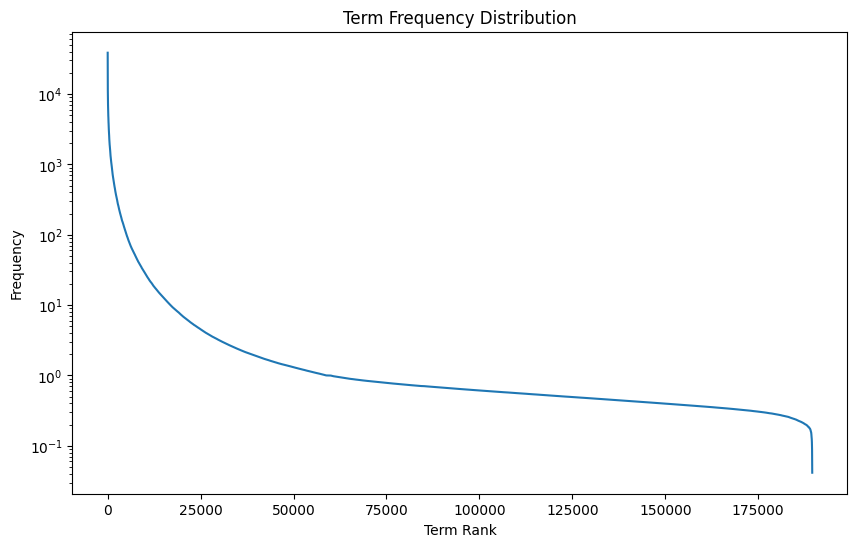

In [17]:
#plot distribution of term frequencies
plt.figure(figsize=(10,6))
plt.plot(features_df['count'].values)
plt.title('Term Frequency Distribution')
plt.xlabel('Term Rank')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale to better visualize the long tail
plt.show()

interpreting figure above: 
- the X-axis represents the rank of terms based on their frequency. 1st ranked term has highest frequency.
- y axis reflects the value of the frequency for each term
- helps with feature selection. frequent terms might be important features for model. too many features could lead to overfitting.
- distribution of figure shows a steep decline followed by a long tail. this means that first few terms are commonly used, dominating the dataset. 

In [18]:
# Display the number of unique terms in the vocabulary
print("Number of unique terms in the vocabulary:", len(feature_names))

Number of unique terms in the vocabulary: 189530


In [19]:
#vectorise the text

#to handle NaN values 
X_text=X_text.fillna('')

#max_features= based on unique terms and distribution of figure
#set to 1000,5000,10000,20000 and compare performance

# Experiment with different values for max_features
max_features_values = [1000, 5000, 10000, 20000, 25000]

for max_features in max_features_values:
    # Vectorize the text data
    tfidf = TfidfVectorizer(max_features=max_features)
    X_text_tfidf = tfidf.fit_transform(X_text)
    
    # Combine text and numeric data
    X_combined = scipy.sparse.hstack([X_text_tfidf, X_numeric])
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
    
    # Train the model
    model = MultinomialNB()
    model.fit(X_train, y_train)
    
    # Predict and evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"max_features={max_features}, Accuracy: {accuracy}")

max_features=1000, Accuracy: 0.1608593795215436
max_features=5000, Accuracy: 0.1614960128635164
max_features=10000, Accuracy: 0.1615916336816783
max_features=20000, Accuracy: 0.1615916336816783
max_features=25000, Accuracy: 0.16159415001899835


when max_features=10000, we get the highest accuracy

In [20]:
from sklearn.model_selection import GridSearchCV

# Set max_features to 10000
tfidf = TfidfVectorizer(max_features=10000)
X_text_tfidf = tfidf.fit_transform(X_text)

# Combine text and numeric data
X_combined = scipy.sparse.hstack([X_text_tfidf, X_numeric])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Define a grid of hyperparameters
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0] #smoothing parameter
}

# Initialize the model
model = MultinomialNB()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict and evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Best hyperparameters: {'alpha': 0.1}
Accuracy: 0.1619061758466846
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.07      0.13    352228
         1.0       0.11      0.89      0.19     45175

    accuracy                           0.16    397403
   macro avg       0.47      0.48      0.16    397403
weighted avg       0.75      0.16      0.13    397403



alpha=0.1 gives the highest accuracy, alpha is a smoothing parameter used to handle 0 probabilites

Cross-validation to further evaluate the model

In [21]:
# Cross-validation to further validate the model
cv_scores = cross_val_score(best_model, X_combined, y, cv=10, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean()}")

Cross-validation accuracy: 0.1595758019209746


repeating the model again but leaving out the Date attribute. The date attribute could have led to overfitting since the correlation between date and depressed users is small

In [22]:
df=pd.read_csv('../data/reddit_depression_dataset_cleaned.csv')

In [23]:
df.head()

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text
0,0,0.0,2014-07-14 03:35:09,4.0,0.0,Deep thoughts underdog Only when we start cons...,"['deep', 'thoughts', 'underdog', 'only', 'when...","['deep', 'thoughts', 'underdog', 'only', 'when...","['deep', 'thoughts', 'underdog', 'start', '99'...","['deep', 'thought', 'underdog', 'start', '99',...","['deep', 'thought', 'underdog', 'onli', 'when'...",deep thought underdog start 99 underdog start ...,deep thought underdog onli when we start consi...
1,1,0.0,2014-09-13 00:31:19,4.0,1.0,"I like this sub, there's only two posts yet I ...","['i', 'like', 'this', 'sub', ',', ""there's"", '...","['i', 'like', 'this', 'sub', 'only', 'two', 'p...","['posts', 'coming', 'human', 'morality', 'joke...","['post', 'come', 'human', 'moral', 'joke', 'lo...","['i', 'like', 'thi', 'sub', 'onli', 'two', 'po...",post come human moral joke long abscenc hope d...,i like thi sub onli two post yet i keep come b...
2,2,0.0,2014-11-20 04:31:58,6.0,1.0,Rebirth! Hello. \nI am the new guy in charge h...,"['rebirth', '!', 'hello', '.', 'i', 'am', 'the...","['rebirth', 'hello', 'i', 'am', 'the', 'new', ...","['rebirth', 'guy', 'charge', 'thegood', 'ofc',...","['rebirth', 'guy', 'charg', 'thegood', 'ofc', ...","['rebirth', 'hello', 'i', 'am', 'the', 'new', ...",rebirth guy charg thegood ofc bring weirdpinea...,rebirth hello i am the new guy in charg here b...
3,3,0.0,2014-11-20 19:38:05,25.0,2.0,"""I want to be like water. I want to slip throu...","['""', 'i', 'want', 'to', 'be', 'like', 'water'...","['i', 'want', 'to', 'be', 'like', 'water', 'i'...","['water', 'slip', 'fingers', 'hold', 'ship', '...","['water', 'slip', 'finger', 'hold', 'ship', 'm...","['i', 'want', 'to', 'be', 'like', 'water', 'i'...",water slip finger hold ship michel william,i want to be like water i want to slip through...
4,5,0.0,2014-11-22 19:17:39,8.0,23.0,What is the limit of the knowledge and power a...,"['what', 'is', 'the', 'limit', 'of', 'the', 'k...","['what', 'is', 'the', 'limit', 'of', 'the', 'k...","['limit', 'knowledge', 'power', 'human', 'pers...","['limit', 'knowledg', 'power', 'human', 'perso...","['what', 'is', 'the', 'limit', 'of', 'the', 'k...",limit knowledg power human person infinit grow,what is the limit of the knowledg and power a ...


In [24]:
#check if there negative values in the upvotes column of the dataset
df[df['upvotes']<0]

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text


In [25]:
#check if there are negative values in the num_comemnts column of the dataset
df[df['num_comments']<0]

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text
1772493,2020957,1.0,2015-01-05 19:38:10,8.0,-3.0,somebody please help me i cant type all the st...,"['somebody', 'please', 'help', 'me', 'i', 'can...","['somebody', 'please', 'help', 'me', 'i', 'can...","['type', 'stuff', 'talk', 'preferably', 'skype...","['type', 'stuff', 'talk', 'prefer', 'skype', '...","['somebodi', 'pleas', 'help', 'me', 'i', 'cant...",type stuff talk prefer skype text voic advanc,somebodi pleas help me i cant type all the stu...
1853457,2182091,1.0,2011-02-24 21:40:07,36.0,-2.0,Life Graph [crosspost from r/pics],"['life', 'graph', '[', 'crosspost', 'from', 'r...","['life', 'graph', 'crosspost', 'from', 'r', 'p...","['life', 'graph', 'crosspost', 'pics']","['life', 'graph', 'crosspost', 'pic']","['life', 'graph', 'crosspost', 'from', 'r', 'p...",life graph crosspost pic,life graph crosspost from r pic


In [26]:
df['num_comments']=df['num_comments'].apply(lambda x: 0 if x<0 else x)

In [27]:
#check if there are negative values in the num_comemnts column of the dataset
df[df['num_comments']<0]
# there should be no negative values in the num_comments column

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text


In [28]:
prior_prob_depressed=len(df[df.label==1])/len(df)
print('Prior probability of being depressed:',prior_prob_depressed)

Prior probability of being depressed: 0.11341759054177354


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [30]:
#select relevant features
X_text=df['combined_stemmed_text']
X_numeric=df[['upvotes','num_comments']]
y=df['label']

In [31]:
tfidf=TfidfVectorizer()
X_text=X_text.fillna('')
X_text_tfidf=tfidf.fit_transform(X_text) 

In [32]:
#understanding csv to decide how many frequent terms to include
#decide on the value for max_features

#this is to get the feature names (vocabulary) 
#and their coreesponding counts
feature_names=tfidf.get_feature_names_out()
feature_counts=X_text_tfidf.sum(axis=0).A1

print(feature_counts)

[1.37505755e+02 2.71641844e+02 8.78929886e+00 ... 2.29319696e-01
 3.87946412e-01 2.67261242e-01]


In [33]:
#create dataframe of feature names and counts
features_df=pd.DataFrame({'feature':feature_names,'count':feature_counts})

#sort the dataframe by count in descending order
features_df=features_df.sort_values(by='count',ascending=False)

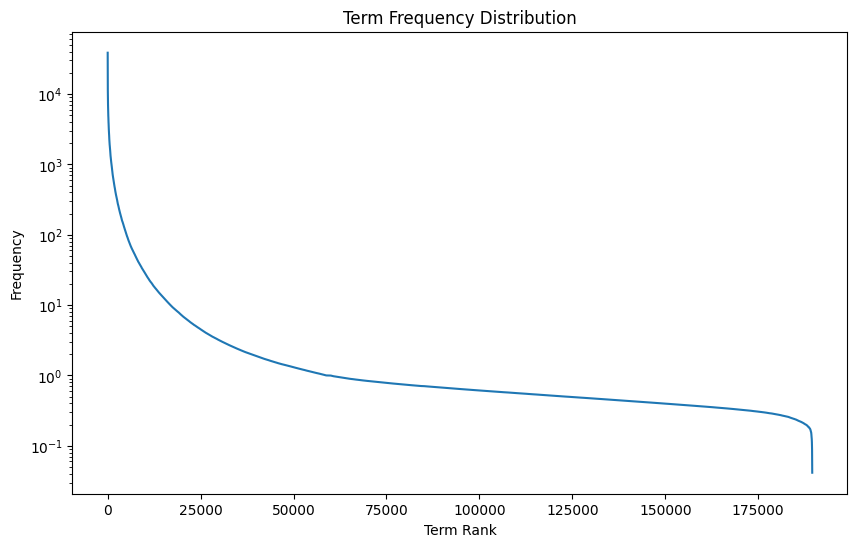

In [34]:
#plot distribution of term frequencies
plt.figure(figsize=(10,6))
plt.plot(features_df['count'].values)
plt.title('Term Frequency Distribution')
plt.xlabel('Term Rank')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale to better visualize the long tail
plt.show()

In [35]:
# Display the number of unique terms in the vocabulary
print("Number of unique terms in the vocabulary:", len(feature_names))

Number of unique terms in the vocabulary: 189530


In [36]:
#vectorise the text

#to handle NaN values 
X_text=X_text.fillna('')

#max_features= based on unique terms and distribution of figure
#set to 1000,5000,10000,20000 and compare performance

# Experiment with different values for max_features
max_features_values = [1000, 5000, 10000, 20000, 25000]

for max_features in max_features_values:
    # Vectorize the text data
    tfidf = TfidfVectorizer(max_features=max_features)
    X_text_tfidf = tfidf.fit_transform(X_text)
    
    # Combine text and numeric data
    X_combined = scipy.sparse.hstack([X_text_tfidf, X_numeric])
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
    
    # Train the model
    model = MultinomialNB()
    model.fit(X_train, y_train)
    
    # Predict and evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"max_features={max_features}, Accuracy: {accuracy}")

max_features=1000, Accuracy: 0.6420233365123061
max_features=5000, Accuracy: 0.672252096738072
max_features=10000, Accuracy: 0.6753220282685335
max_features=20000, Accuracy: 0.6723628155801542
max_features=25000, Accuracy: 0.6708731438866843


In [37]:
from sklearn.model_selection import GridSearchCV

# Set max_features to 10000
tfidf = TfidfVectorizer(max_features=10000)
X_text_tfidf = tfidf.fit_transform(X_text)

# Combine text and numeric data
X_combined = scipy.sparse.hstack([X_text_tfidf, X_numeric])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Define a grid of hyperparameters
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0] #smoothing parameter
}

# Initialize the model
model = MultinomialNB()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict and evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Best hyperparameters: {'alpha': 0.1}
Accuracy: 0.6888599230504048
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.67      0.79    352228
         1.0       0.24      0.83      0.38     45175

    accuracy                           0.69    397403
   macro avg       0.61      0.75      0.59    397403
weighted avg       0.89      0.69      0.75    397403



Repeating the model again, but Utilising n-grams instead of singular words. n-grams would allow for more context

In [5]:
df=pd.read_csv('../data/reddit_depression_dataset_cleaned.csv')

In [66]:
df.head()

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text
0,0,0.0,2014-07-14 03:35:09,4.0,0.0,Deep thoughts underdog Only when we start cons...,"['deep', 'thoughts', 'underdog', 'only', 'when...","['deep', 'thoughts', 'underdog', 'only', 'when...","['deep', 'thoughts', 'underdog', 'start', '99'...","['deep', 'thought', 'underdog', 'start', '99',...","['deep', 'thought', 'underdog', 'onli', 'when'...",deep thought underdog start 99 underdog start ...,deep thought underdog onli when we start consi...
1,1,0.0,2014-09-13 00:31:19,4.0,1.0,"I like this sub, there's only two posts yet I ...","['i', 'like', 'this', 'sub', ',', ""there's"", '...","['i', 'like', 'this', 'sub', 'only', 'two', 'p...","['posts', 'coming', 'human', 'morality', 'joke...","['post', 'come', 'human', 'moral', 'joke', 'lo...","['i', 'like', 'thi', 'sub', 'onli', 'two', 'po...",post come human moral joke long abscenc hope d...,i like thi sub onli two post yet i keep come b...
2,2,0.0,2014-11-20 04:31:58,6.0,1.0,Rebirth! Hello. \nI am the new guy in charge h...,"['rebirth', '!', 'hello', '.', 'i', 'am', 'the...","['rebirth', 'hello', 'i', 'am', 'the', 'new', ...","['rebirth', 'guy', 'charge', 'thegood', 'ofc',...","['rebirth', 'guy', 'charg', 'thegood', 'ofc', ...","['rebirth', 'hello', 'i', 'am', 'the', 'new', ...",rebirth guy charg thegood ofc bring weirdpinea...,rebirth hello i am the new guy in charg here b...
3,3,0.0,2014-11-20 19:38:05,25.0,2.0,"""I want to be like water. I want to slip throu...","['""', 'i', 'want', 'to', 'be', 'like', 'water'...","['i', 'want', 'to', 'be', 'like', 'water', 'i'...","['water', 'slip', 'fingers', 'hold', 'ship', '...","['water', 'slip', 'finger', 'hold', 'ship', 'm...","['i', 'want', 'to', 'be', 'like', 'water', 'i'...",water slip finger hold ship michel william,i want to be like water i want to slip through...
4,5,0.0,2014-11-22 19:17:39,8.0,23.0,What is the limit of the knowledge and power a...,"['what', 'is', 'the', 'limit', 'of', 'the', 'k...","['what', 'is', 'the', 'limit', 'of', 'the', 'k...","['limit', 'knowledge', 'power', 'human', 'pers...","['limit', 'knowledg', 'power', 'human', 'perso...","['what', 'is', 'the', 'limit', 'of', 'the', 'k...",limit knowledg power human person infinit grow,what is the limit of the knowledg and power a ...


In [67]:
#check if there negative values in the upvotes column of the dataset
df[df['upvotes']<0]

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text


In [68]:
#check if there are negative values in the num_comemnts column of the dataset
df[df['num_comments']<0]

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text
1772493,2020957,1.0,2015-01-05 19:38:10,8.0,-3.0,somebody please help me i cant type all the st...,"['somebody', 'please', 'help', 'me', 'i', 'can...","['somebody', 'please', 'help', 'me', 'i', 'can...","['type', 'stuff', 'talk', 'preferably', 'skype...","['type', 'stuff', 'talk', 'prefer', 'skype', '...","['somebodi', 'pleas', 'help', 'me', 'i', 'cant...",type stuff talk prefer skype text voic advanc,somebodi pleas help me i cant type all the stu...
1853457,2182091,1.0,2011-02-24 21:40:07,36.0,-2.0,Life Graph [crosspost from r/pics],"['life', 'graph', '[', 'crosspost', 'from', 'r...","['life', 'graph', 'crosspost', 'from', 'r', 'p...","['life', 'graph', 'crosspost', 'pics']","['life', 'graph', 'crosspost', 'pic']","['life', 'graph', 'crosspost', 'from', 'r', 'p...",life graph crosspost pic,life graph crosspost from r pic


In [69]:
df['num_comments']=df['num_comments'].apply(lambda x: 0 if x<0 else x)

In [70]:
#check if there are negative values in the num_comemnts column of the dataset
df[df['num_comments']<0]
# there should be no negative values in the num_comments column

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text


In [71]:
prior_prob_depressed=len(df[df.label==1])/len(df)
print('Prior probability of being depressed:',prior_prob_depressed)

Prior probability of being depressed: 0.11341759054177354


In [72]:
#select relevant features
X_text=df['combined_stemmed_text']
X_numeric=df[['upvotes','num_comments']]
y=df['label']

In [73]:
X_text=X_text.fillna('')

In [74]:
print(X_text)

0          deep thought underdog start 99 underdog start ...
1          post come human moral joke long abscenc hope d...
2          rebirth guy charg thegood ofc bring weirdpinea...
3                 water slip finger hold ship michel william
4             limit knowledg power human person infinit grow
                                 ...                        
1987006    intent car crash yesterday car sped 110 mph in...
1987007    usual argu mom hour ago feel attack offend las...
1987008    need urgent basic famili invit christma year c...
1987009                               think today gonna push
1987010                            2022 year review suck god
Name: combined_stemmed_text, Length: 1987011, dtype: object


In [75]:
#add all the items in X_text into one array separated by comma
#Tfidvectorizer expects input to be list or iterable of strings
X_text = X_text.tolist()
print(X_text[:5])

['deep thought underdog start 99 underdog start root', 'post come human moral joke long abscenc hope deep thought day', 'rebirth guy charg thegood ofc bring weirdpineappl intrusivethought subreddit aliv fun', 'water slip finger hold ship michel william', 'limit knowledg power human person infinit grow']


In [ ]:
# Step 1: Vectorize the text data using n-grams
# Here, ngram_range=(1, 2) means unigrams (1-word sequences) and bigrams (2-word sequences)
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_transformed = vectorizer.fit_2transform(X_text)

#combine text and numeric data
#we will not include date variable as it did not improve the model
# Combine text and numeric data
X_combined = scipy.sparse.hstack([X_transformed, X_numeric])


In [78]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
# Define a grid of hyperparameters
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0] #smoothing parameter
}

#train the model
nb_model=MultinomialNB()

grid_search=GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

#get the best model
best_model=grid_search.best_estimator_


#make predictions
y_pred=best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"best hyperparameters: {grid_search.best_params_}")
print("accuracy",accuracy)
print(classification_report(y_test,y_pred))

best hyperparameters: {'alpha': 1.0}
accuracy 0.8984481747747249
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94    352228
         1.0       0.56      0.47      0.51     45175

    accuracy                           0.90    397403
   macro avg       0.75      0.71      0.73    397403
weighted avg       0.89      0.90      0.89    397403



In [79]:
# Cross-validation to further validate the model
cv_scores = cross_val_score(best_model, X_combined, y, cv=10, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean()}")

Cross-validation accuracy: 0.8873453566262798


Accuracy has improved. 

repeat the model, with same concept as ngrams, but now including trigrams as well. 

In [94]:
df=pd.read_csv('../data/reddit_depression_dataset_cleaned.csv')

In [95]:
df.head()

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text
0,0,0.0,2014-07-14 03:35:09,4.0,0.0,Deep thoughts underdog Only when we start cons...,"['deep', 'thoughts', 'underdog', 'only', 'when...","['deep', 'thoughts', 'underdog', 'only', 'when...","['deep', 'thoughts', 'underdog', 'start', '99'...","['deep', 'thought', 'underdog', 'start', '99',...","['deep', 'thought', 'underdog', 'onli', 'when'...",deep thought underdog start 99 underdog start ...,deep thought underdog onli when we start consi...
1,1,0.0,2014-09-13 00:31:19,4.0,1.0,"I like this sub, there's only two posts yet I ...","['i', 'like', 'this', 'sub', ',', ""there's"", '...","['i', 'like', 'this', 'sub', 'only', 'two', 'p...","['posts', 'coming', 'human', 'morality', 'joke...","['post', 'come', 'human', 'moral', 'joke', 'lo...","['i', 'like', 'thi', 'sub', 'onli', 'two', 'po...",post come human moral joke long abscenc hope d...,i like thi sub onli two post yet i keep come b...
2,2,0.0,2014-11-20 04:31:58,6.0,1.0,Rebirth! Hello. \nI am the new guy in charge h...,"['rebirth', '!', 'hello', '.', 'i', 'am', 'the...","['rebirth', 'hello', 'i', 'am', 'the', 'new', ...","['rebirth', 'guy', 'charge', 'thegood', 'ofc',...","['rebirth', 'guy', 'charg', 'thegood', 'ofc', ...","['rebirth', 'hello', 'i', 'am', 'the', 'new', ...",rebirth guy charg thegood ofc bring weirdpinea...,rebirth hello i am the new guy in charg here b...
3,3,0.0,2014-11-20 19:38:05,25.0,2.0,"""I want to be like water. I want to slip throu...","['""', 'i', 'want', 'to', 'be', 'like', 'water'...","['i', 'want', 'to', 'be', 'like', 'water', 'i'...","['water', 'slip', 'fingers', 'hold', 'ship', '...","['water', 'slip', 'finger', 'hold', 'ship', 'm...","['i', 'want', 'to', 'be', 'like', 'water', 'i'...",water slip finger hold ship michel william,i want to be like water i want to slip through...
4,5,0.0,2014-11-22 19:17:39,8.0,23.0,What is the limit of the knowledge and power a...,"['what', 'is', 'the', 'limit', 'of', 'the', 'k...","['what', 'is', 'the', 'limit', 'of', 'the', 'k...","['limit', 'knowledge', 'power', 'human', 'pers...","['limit', 'knowledg', 'power', 'human', 'perso...","['what', 'is', 'the', 'limit', 'of', 'the', 'k...",limit knowledg power human person infinit grow,what is the limit of the knowledg and power a ...


In [96]:
#check if there negative values in the upvotes column of the dataset
df[df['upvotes']<0]

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text


In [97]:
#check if there are negative values in the num_comemnts column of the dataset
df[df['num_comments']<0]

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text
1772493,2020957,1.0,2015-01-05 19:38:10,8.0,-3.0,somebody please help me i cant type all the st...,"['somebody', 'please', 'help', 'me', 'i', 'can...","['somebody', 'please', 'help', 'me', 'i', 'can...","['type', 'stuff', 'talk', 'preferably', 'skype...","['type', 'stuff', 'talk', 'prefer', 'skype', '...","['somebodi', 'pleas', 'help', 'me', 'i', 'cant...",type stuff talk prefer skype text voic advanc,somebodi pleas help me i cant type all the stu...
1853457,2182091,1.0,2011-02-24 21:40:07,36.0,-2.0,Life Graph [crosspost from r/pics],"['life', 'graph', '[', 'crosspost', 'from', 'r...","['life', 'graph', 'crosspost', 'from', 'r', 'p...","['life', 'graph', 'crosspost', 'pics']","['life', 'graph', 'crosspost', 'pic']","['life', 'graph', 'crosspost', 'from', 'r', 'p...",life graph crosspost pic,life graph crosspost from r pic


In [98]:
df['num_comments']=df['num_comments'].apply(lambda x: 0 if x<0 else x)

In [99]:
#check if there are negative values in the num_comemnts column of the dataset
df[df['num_comments']<0]
# there should be no negative values in the num_comments column

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text


In [ ]:
prior_prob_depressed=len(df[df.label==1])/len(df)
print('Prior probability of being depressed:',prior_prob_depressed) 

Prior probability of being depressed: 0.11341759054177354


In [101]:
#select relevant features
X_text=df['combined_stemmed_text']
X_numeric=df[['upvotes','num_comments']]
y=df['label']

In [102]:
X_text=X_text.fillna('')

In [103]:
print(X_text)

0          deep thought underdog start 99 underdog start ...
1          post come human moral joke long abscenc hope d...
2          rebirth guy charg thegood ofc bring weirdpinea...
3                 water slip finger hold ship michel william
4             limit knowledg power human person infinit grow
                                 ...                        
1987006    intent car crash yesterday car sped 110 mph in...
1987007    usual argu mom hour ago feel attack offend las...
1987008    need urgent basic famili invit christma year c...
1987009                               think today gonna push
1987010                            2022 year review suck god
Name: combined_stemmed_text, Length: 1987011, dtype: object


In [104]:
#add all the items in X_text into one array separated by comma
#Tfidvectorizer expects input to be list or iterable of strings
X_text = X_text.tolist()
print(X_text[:5])

['deep thought underdog start 99 underdog start root', 'post come human moral joke long abscenc hope deep thought day', 'rebirth guy charg thegood ofc bring weirdpineappl intrusivethought subreddit aliv fun', 'water slip finger hold ship michel william', 'limit knowledg power human person infinit grow']


In [105]:
# Step 1: Vectorize the text data using n-grams
# Here, ngram_range=(1, 2) means unigrams (1-word sequences) and bigrams (2-word sequences)
vectorizer = TfidfVectorizer(ngram_range=(1, 4))
X_transformed = vectorizer.fit_transform(X_text)

#combine text and numeric data
#we will not include date variable as it did not improve the model
# Combine text and numeric data
X_combined = scipy.sparse.hstack([X_transformed, X_numeric])


In [106]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
# Define a grid of hyperparameters
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0] #smoothing parameter
}

#train the model
nb_model=MultinomialNB()

grid_search=GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

#get the best model
best_model=grid_search.best_estimator_


#make predictions
y_pred=best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"best hyperparameters: {grid_search.best_params_}")
print("accuracy",accuracy)
print(classification_report(y_test,y_pred))

best hyperparameters: {'alpha': 0.5}
accuracy 0.8951945506198997
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94    352228
         1.0       0.58      0.28      0.37     45175

    accuracy                           0.90    397403
   macro avg       0.75      0.63      0.66    397403
weighted avg       0.88      0.90      0.88    397403



In [107]:
# Cross-validation to further validate the model
cv_scores = cross_val_score(best_model, X_combined, y, cv=10, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean()}")

Cross-validation accuracy: 0.8894611006813277


not much improvement in accuracy

model with n-grams(bi-grams, tri-grams and 4-grams)

In [6]:
df=pd.read_csv('../data/reddit_depression_dataset_cleaned.csv')

In [7]:
df['num_comments']=df['num_comments'].apply(lambda x: 0 if x<0 else x)

In [8]:
#check if there are negative values in the num_comemnts column of the dataset
df[df['num_comments']<0]
# there should be no negative values in the num_comments column

,Unnamed: 0,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text


In [9]:
#select relevant features
X_text=df['combined_stemmed_text']
X_numeric=df[['upvotes','num_comments']]
y=df['label']

In [10]:
X_text=X_text.fillna('')

In [11]:
print(X_text)

0          deep thought underdog start 99 underdog start ...
1          post come human moral joke long abscenc hope d...
2          rebirth guy charg thegood ofc bring weirdpinea...
3                 water slip finger hold ship michel william
4             limit knowledg power human person infinit grow
                                 ...                        
1987006    intent car crash yesterday car sped 110 mph in...
1987007    usual argu mom hour ago feel attack offend las...
1987008    need urgent basic famili invit christma year c...
1987009                               think today gonna push
1987010                            2022 year review suck god
Name: combined_stemmed_text, Length: 1987011, dtype: object


In [12]:
#add all the items in X_text into one array separated by comma
#Tfidvectorizer expects input to be list or iterable of strings
X_text = X_text.tolist()
print(X_text[:5])

['deep thought underdog start 99 underdog start root', 'post come human moral joke long abscenc hope deep thought day', 'rebirth guy charg thegood ofc bring weirdpineappl intrusivethought subreddit aliv fun', 'water slip finger hold ship michel william', 'limit knowledg power human person infinit grow']


In [13]:
# Step 1: Vectorize the text data using n-grams
# Here, ngram_range=(1, 2) means unigrams (1-word sequences) and bigrams (2-word sequences)
vectorizer = TfidfVectorizer(ngram_range=(2, 4))
X_transformed = vectorizer.fit_transform(X_text)

#combine text and numeric data
#we will not include date variable as it did not improve the model
# Combine text and numeric data
X_combined = scipy.sparse.hstack([X_transformed, X_numeric])


In [15]:
from sklearn.model_selection import GridSearchCV
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
# Define a grid of hyperparameters
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0] #smoothing parameter
}

#train the model
nb_model=MultinomialNB()

grid_search=GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

#get the best model
best_model=grid_search.best_estimator_


#make predictions
y_pred=best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"best hyperparameters: {grid_search.best_params_}")
print("accuracy",accuracy)
print(classification_report(y_test,y_pred))

best hyperparameters: {'alpha': 0.5}
accuracy 0.8838106405839916
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94    352228
         1.0       0.48      0.27      0.35     45175

    accuracy                           0.88    397403
   macro avg       0.70      0.62      0.64    397403
weighted avg       0.86      0.88      0.87    397403



In [16]:
# Cross-validation to further validate the model
cv_scores = cross_val_score(best_model, X_combined, y, cv=10, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean()}")

Cross-validation accuracy: 0.8750988220373035


not much difference in accuracy

General pointers for improving model:
- ensure that we are not overfitting (hence date was excluded)
- consider hyperparameters such as alpha 
- alternative methods ngram VS TF-IDF
- cross validation to evaluate the model's performance on different subsets of the data